<a href="https://colab.research.google.com/github/lucasm-paixao/analise_preditiva/blob/main/analise_prescritiva2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [11]:
import kagglehub

path = 'https://www.kaggle.com/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid?resource=download'

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = '/content/drive/MyDrive/portfólio_dados/Medicaldataset.csv'

Lendo o dataset


In [34]:
df = pd.read_csv(df)

In [37]:
df.describe()

,idade,genero,frequencia_cardiaca,pressao_sistolica_sangue,pressao_diastolica_sangue,acucar_sangue,CK-MB,troponina
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


Organizando o dataset

In [35]:
df = df.rename(columns= {'Age': 'idade',
                         'Gender': 'genero',
                         'Heart rate': 'frequencia_cardiaca',
                         'Systolic blood pressure': 'pressao_sistolica_sangue',
                         'Diastolic blood pressure': 'pressao_diastolica_sangue',
                         'Blood sugar': 'acucar_sangue',
                         'Troponin': 'troponina',
                         'Result': 'resultado'})

df.head()

,idade,genero,frequencia_cardiaca,pressao_sistolica_sangue,pressao_diastolica_sangue,acucar_sangue,CK-MB,troponina,resultado
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [41]:
df['genero'].value_counts()

,count
genero,
1,870
0,449


In [42]:
df['resultado'].value_counts()

,count
resultado,
positive,810
negative,509


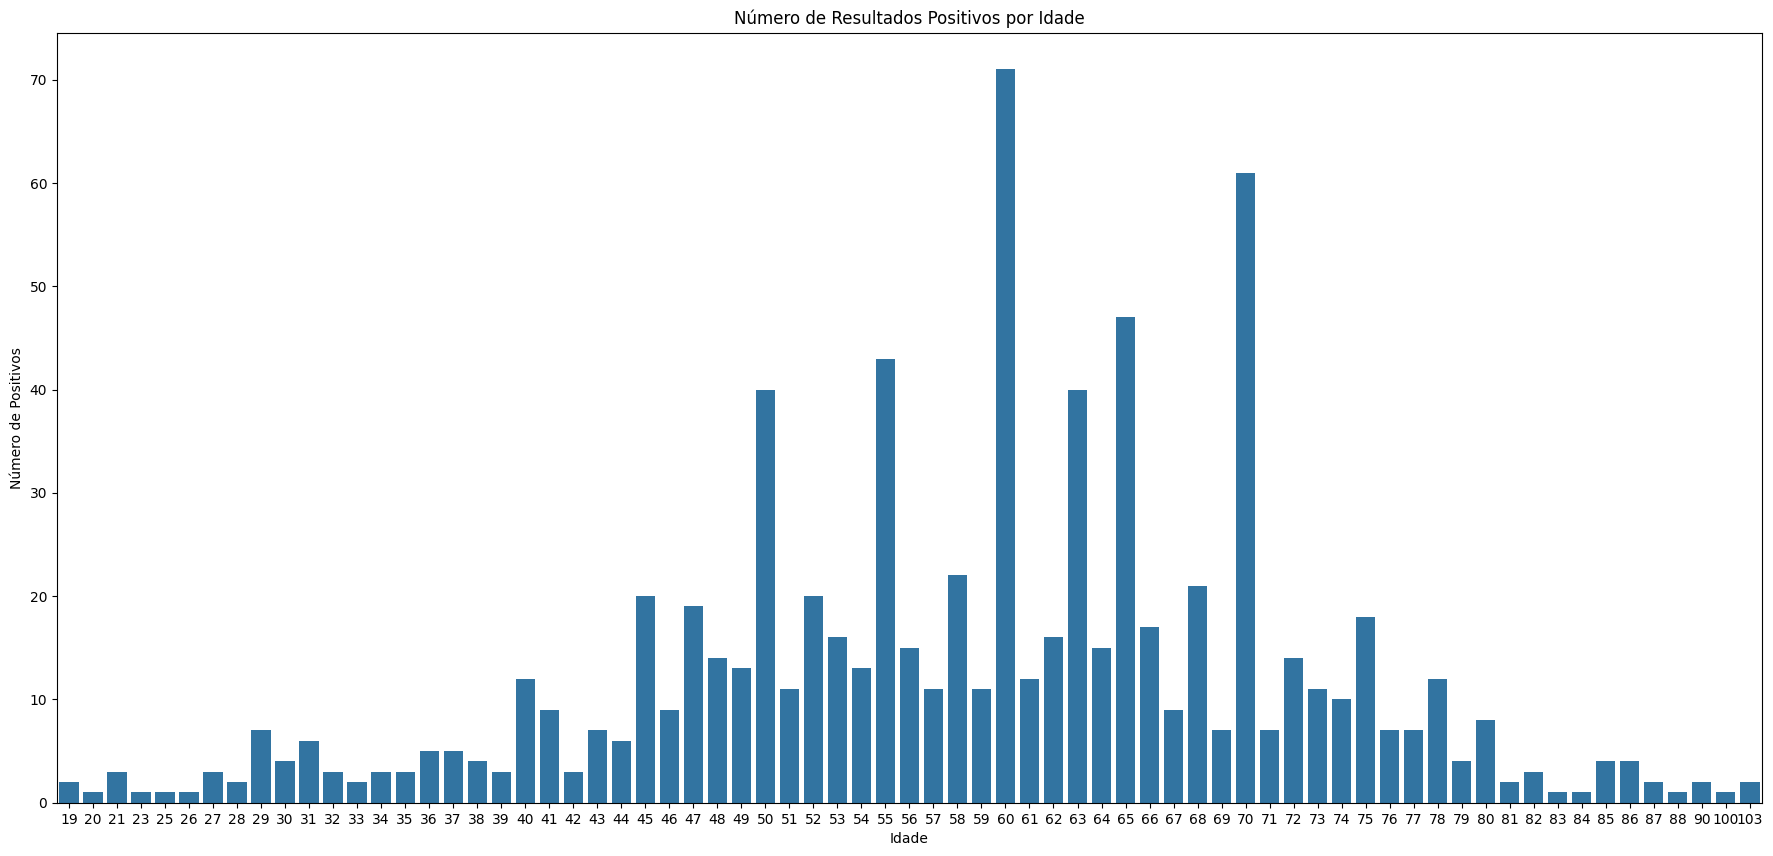

In [25]:
positivos = df[df['resultado'] == 'positive']

plt.figure(figsize=(22, 10))

sns.countplot(x='idade', data=positivos)
plt.title('Número de Resultados Positivos por Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Positivos')
plt.show()

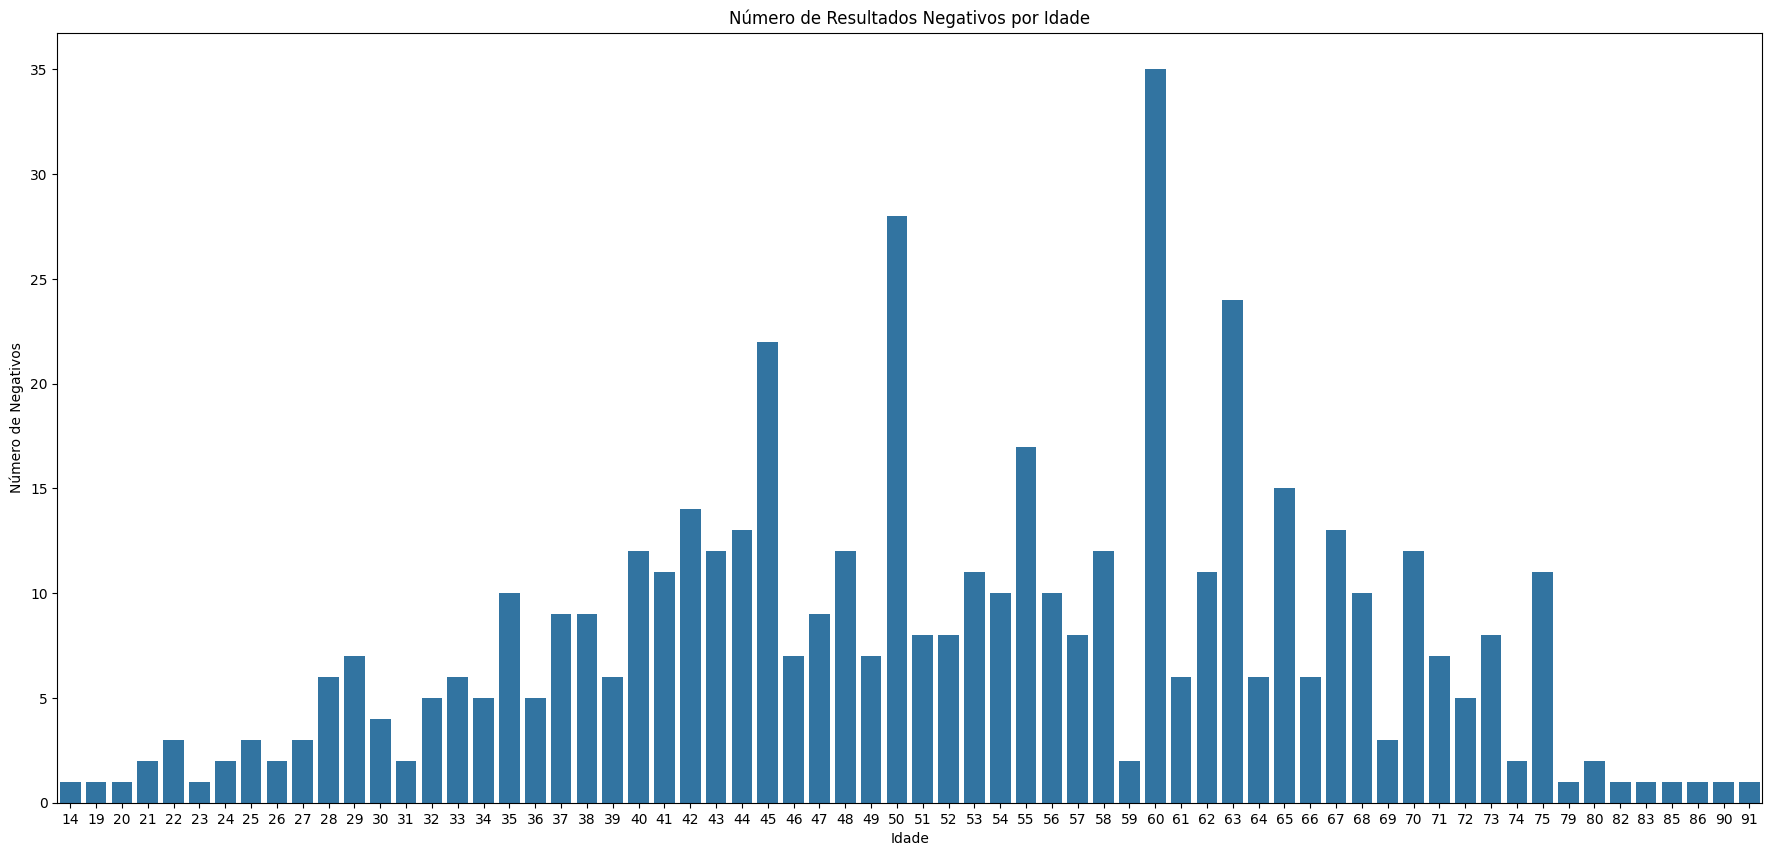

In [47]:
positivos = df[df['resultado'] == 'negative']

plt.figure(figsize=(22, 10))

sns.countplot(x='idade', data=positivos)
plt.title('Número de Resultados Negativos por Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Negativos')
plt.show()

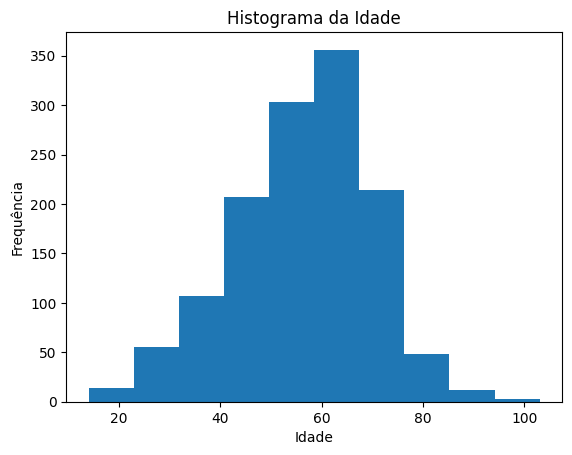

In [43]:
plt.hist(df['idade'])
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma da Idade')
plt.show()

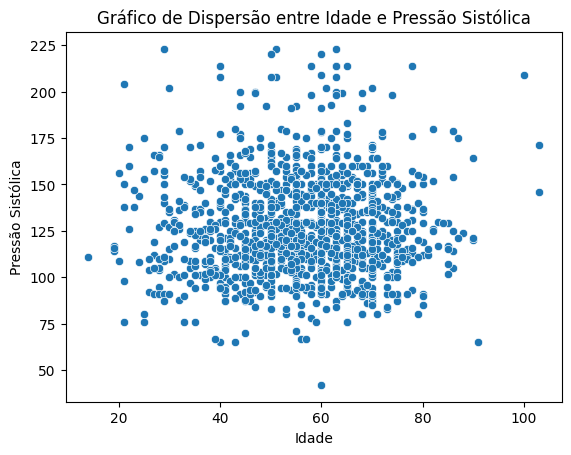

In [48]:
sns.scatterplot(x='idade', y='pressao_sistolica_sangue', data=df)
plt.xlabel('Idade')
plt.ylabel('Pressão Sistólica')
plt.title('Gráfico de Dispersão entre Idade e Pressão Sistólica')
plt.show()

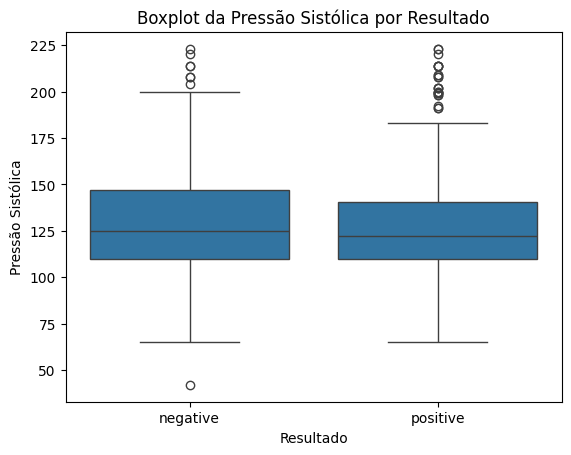

In [50]:
sns.boxplot(x='resultado', y='pressao_sistolica_sangue', data=df)
plt.xlabel('Resultado')
plt.ylabel('Pressão Sistólica')
plt.title('Boxplot da Pressão Sistólica por Resultado')
plt.show()

In [51]:
df.groupby('idade')['pressao_sistolica_sangue'].mean()

,pressao_sistolica_sangue
idade,
14,111.000000
19,115.666667
20,132.500000
21,133.200000
22,152.000000
...,...
88,124.000000
90,135.000000
91,65.000000


In [52]:
pd.pivot_table(df, values='pressao_sistolica_sangue', index='genero', columns='resultado', aggfunc='mean')

resultado,negative,positive
genero,,
0,127.732673,125.979757
1,127.938111,127.072824
